## ${\textbf{Libraries}}$

In [92]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

# dendrogram is a tree-like, hirarchical representation of points 
    # it is what we normally use for hirarchical solutions
    # Linkage is a specific employed method 
from scipy.cluster.hierarchy import dendrogram, linkage

# K Means Clustering 
from sklearn.cluster import KMeans

# importing PCA
from sklearn.decomposition import PCA

# this is to turn python objects into string streams
import pickle 

## ${\textbf{Import Data}}$

In [72]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [73]:
# .head is to display rows of the DF 

df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [74]:
# .describe is to have all the count mean and stuff to come out
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## ${\textbf{Correlation Estimate}}$

In [75]:
# .corr() is to read the chart from hortizontal and vertical, with 1 being the most correlated and -1 being the least 
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


TypeError: 'str' object is not callable

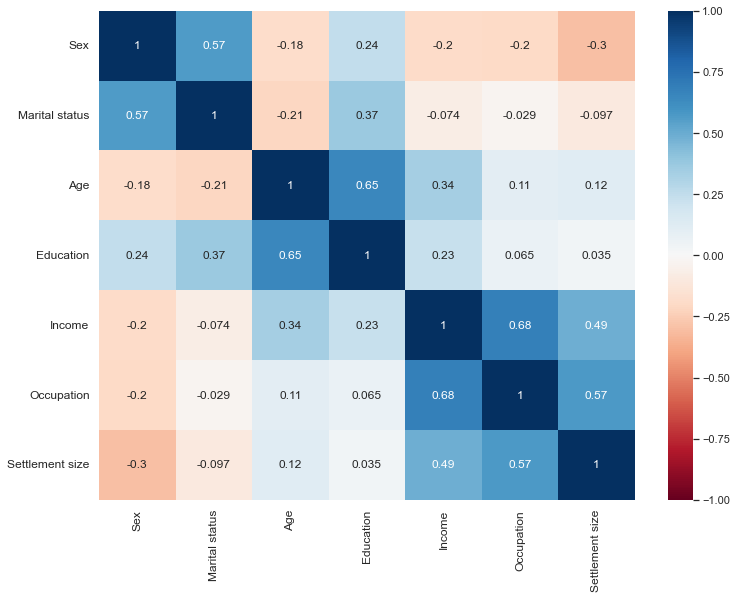

In [76]:
# 12 is wide, 9 is height 
plt.figure(figsize = (12, 9))

# sns.heatmap is standard so you just include the file name beside
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               # vmin and vmax should be defined, cuz if you dont, then it will be weird 
               vmin = -1, 
               vmax = 1)

# setting the x and y axis and their rotation 
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
# setting the title 
plt.title('Correlation Heatmap')
plt.show()

## ${\textbf{Visualize Raw Data}}$

TypeError: 'str' object is not callable

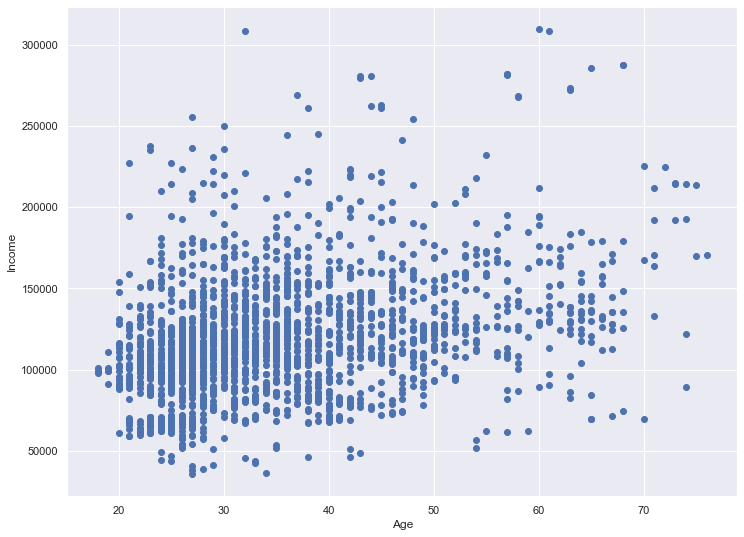

In [77]:
plt.figure(figsize = (12, 9))
# we only want to show col 2 and 4 because that is the age and income 
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

In [78]:
# we want to standardize this because we wanna compare everything relatively 

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## ${\textbf{Hierarchical Clustering}}$

In [79]:
# this is to show the hierarchical and use the linkage method to do it 
hier_clust = linkage(segmentation_std, method = 'ward')


In [80]:
# we need to find a horizontal line on the dendrogram on which to cut 
    # so the rule of thumb is to find the longest vertical line unintercepted by a horizontal line from the dendrogram
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

TypeError: 'str' object is not callable

<Figure size 864x648 with 0 Axes>

### So usually, hierarchical clustering is really slow, the only advantage is that it tells us how many clusters are there. 
therefore we would usually use this clustering to determine clusters and then move on to flat clustering for segmentation 

## K-Means Clustering 

In [81]:
# initialize the within sum of square (WCSS)
wcss = []
for i in range (1,11):
    # k-means++ is an initialization algorithm that finds the best cluster seeds 
    # random_state is to ensure that we will get the initial centroid if we run the code multiple times
    # 42 is a random number
        # but not sure what does the i stand for though
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # fitting the kmeans data onto our dataset 
    kmeans.fit(segmentation_std)
    # with each iteration, adding the value to the wcss.array 
    # the array is stored in the kmeans.inertia
    wcss.append(kmeans.inertia_)

TypeError: 'str' object is not callable

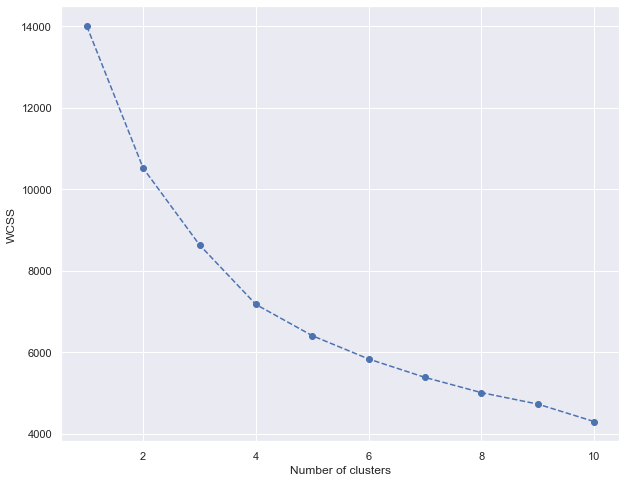

In [82]:
plt.figure(figsize = (10,8))
# range(1,11) is the x axis 
# wcss is the y axis
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('K-Means Clustering')
plt.show()

### Notes: 
when reading the above chart, you have to be careful and can read up more on the elbow method 

In [ ]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++', random_state=42 )


In [ ]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### Results 

In [ ]:
# making a copy of our segmentation dataframe 
df_segm_kmeans = df_segmentation.copy()

# adding a new column named segment K-means 
# we will use this col to store all the predictive cluster data 
# the prediction can be extracted from the label attribute 
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [ ]:
# groupby segment k means and then find the mean value 
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [ ]:
# we want to group by count instead of mean 
# we also want to add a new col > df_segm_analysis['N Obs']
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

# N Obs, the Obs has to be big letter O, but im not sure why if its small letter it wont work 
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum() 
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [ ]:
# this is how you rename the columns in the dataframe

df_segm_analysis.rename({
    0:'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [ ]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({
    0:'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career focused'
})

/Users/sethchong/Dev/data_sci/venv_1/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


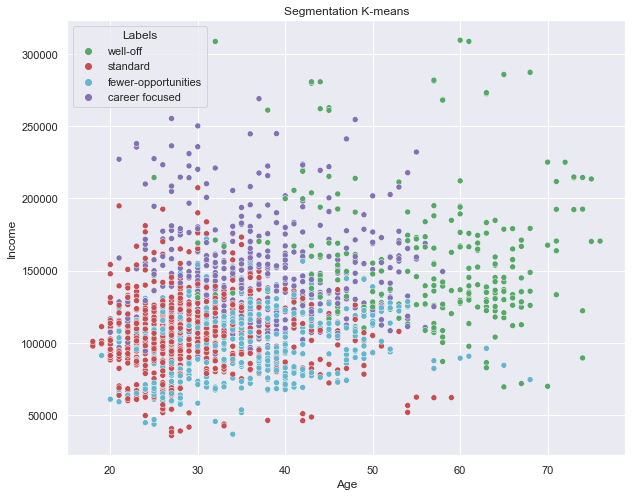

In [ ]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette=['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

## We can tell that from the above chart, the clustering worked but its not very useful, but nonetheless this is still very useful 

---
so we are going to try and use Principal Component Analysis (PCA) to try it on K-means clustering 

### Principal Component Analysis (PCA)

In [ ]:
# let the pca variable = an instance of the PCA class
pca = PCA()

In [ ]:
pca.fit(segmentation_std)

PCA()

In [ ]:
# to find out how many components there are on the PCA
# this will always sum to 1
    # but the main goal of the explained_variance_ratio_ is to also help you reduce the number of components so that you can only include the only useful ones 
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

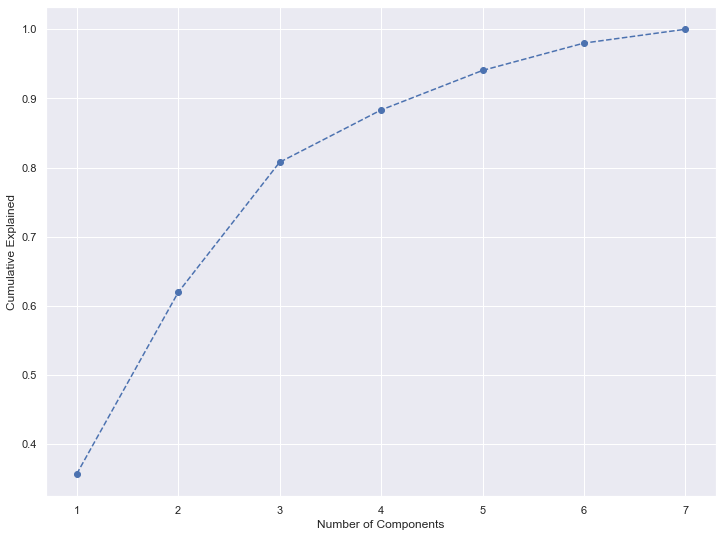

In [ ]:
plt.figure(figsize=(12,9))
# we are using cumulative sum here because we want to know how much of an impact as we increase the variance
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title=('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained')
plt.show()

so from the above chart, we can tell that just by using 3 components, we can hit 80% of the cumulative variance. 

to choose how many variance, there is no hard truths to this, but rule of thumb is to hit at least 80% of the variance 

In [ ]:
# telling pca that we only want 3 components
pca = PCA(n_components=3)

In [ ]:
# completing the pca chart
pca.fit(segmentation_std)

PCA(n_components=3)

### PCA Results

In [ ]:
# let's find out more info about the 3 components 
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

^ so the values inside the array is called loading 

loading is the correlation between an original variable and a component 

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_, 
# taking the values from df_segmentation dataframe
columns=df_segmentation.columns.values,
index = ['Component 1', 'Component 2', 'Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x15baae9e0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

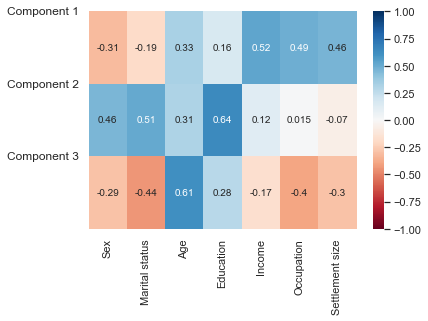

In [ ]:
sns.heatmap(df_pca_comp, 
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)
plt.yticks([0,1,2],
            ['Component 1', 'Component 2', 'Component 3'],
            rotation = 0,
            fontsize = 12)


In [ ]:
# getting PCA scores
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
# storing the scores into another variable
scores_pca = pca.transform(segmentation_std)

## K-Means Clustering with PCA

In [83]:

wcss = []
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

TypeError: 'str' object is not callable

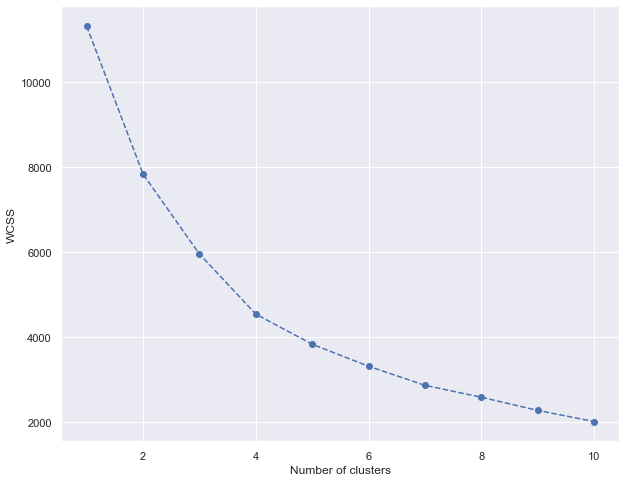

In [84]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title ('K-means with PCA Clustering')
plt.show()

We will be picking 4 clusters in this case

In [ ]:
kmeans_pca = KMeans(n_clusters=4, init= 'k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### K-means clusterin with PCA Results

In [85]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
# appending the the k means pca into the dataframe as well 
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [86]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,8
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,4
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,7
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,7
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,4
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,9
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [87]:
# finding the mean value of each cluster
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.000000,0.000000,27.660494,0.000000,123281.216049,1.006173,1.135802,0.387872,-2.278486,-0.474282
1,0.003663,0.007326,41.996337,1.000000,129933.824176,0.978022,1.098901,1.092093,-0.794309,0.724472
2,0.917241,0.962069,27.282759,1.000000,88597.462069,0.258621,0.000000,-2.012939,0.574875,-0.396934
3,0.666667,1.000000,50.155556,2.140741,168460.881481,1.362963,1.414815,1.825969,2.375485,-0.115203
4,0.720524,0.960699,27.967249,1.000000,122117.087336,1.058952,0.934498,-0.256082,0.458811,-1.226110
5,0.006410,0.141026,36.730769,0.820513,172068.532051,1.839744,1.698718,2.433030,-0.880268,-0.687143
6,0.774194,0.750000,53.008065,2.120968,108981.991935,0.201613,0.080645,-0.549210,2.165986,1.645568
7,0.417021,0.085106,38.455319,1.000000,94247.817021,0.153191,0.038298,-1.031285,-0.473679,1.280563
8,0.000000,0.028571,63.814286,2.000000,170172.614286,1.285714,1.300000,2.861266,0.994001,1.863759


In [88]:

df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Income']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum() 
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({
    0:'standard',
    1: 'Career focused',
    2: 'fewer oppportunities',
    3:'well off'
})

df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.000000,0.000000,27.660494,0.000000,123281.216049,1.006173,1.135802,0.387872,-2.278486,-0.474282,162,0.0810
Career focused,0.003663,0.007326,41.996337,1.000000,129933.824176,0.978022,1.098901,1.092093,-0.794309,0.724472,273,0.1365
fewer oppportunities,0.917241,0.962069,27.282759,1.000000,88597.462069,0.258621,0.000000,-2.012939,0.574875,-0.396934,290,0.1450
well off,0.666667,1.000000,50.155556,2.140741,168460.881481,1.362963,1.414815,1.825969,2.375485,-0.115203,135,0.0675
4,0.720524,0.960699,27.967249,1.000000,122117.087336,1.058952,0.934498,-0.256082,0.458811,-1.226110,458,0.2290
5,0.006410,0.141026,36.730769,0.820513,172068.532051,1.839744,1.698718,2.433030,-0.880268,-0.687143,156,0.0780
6,0.774194,0.750000,53.008065,2.120968,108981.991935,0.201613,0.080645,-0.549210,2.165986,1.645568,124,0.0620
7,0.417021,0.085106,38.455319,1.000000,94247.817021,0.153191,0.038298,-1.031285,-0.473679,1.280563,235,0.1175
8,0.000000,0.028571,63.814286,2.000000,170172.614286,1.285714,1.300000,2.861266,0.994001,1.863759,70,0.0350


In [89]:
df_segm_pca_kmeans['legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 1:'career focused', 2:'fewer opportunities', 3:'well-off'})

/Users/sethchong/Dev/data_sci/venv_1/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'str' object is not callable

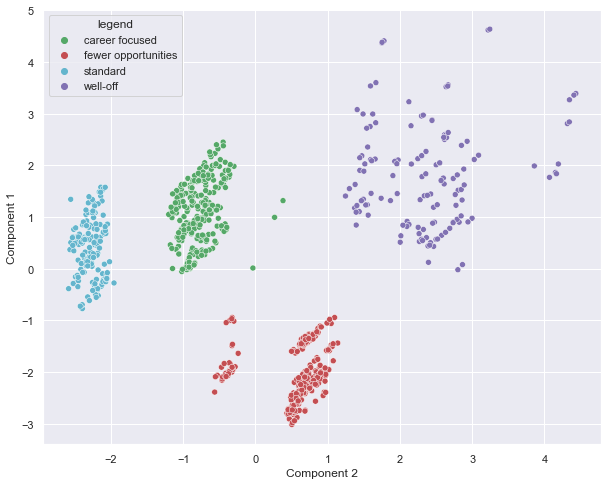

In [90]:
x_axis= df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['legend'], palette=['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show()

### Data Export

In [93]:
# first we need the scaler to preprocess future data in the same way
# .dump is to indicate that we want to export the file 
# wb stands for write bytes
pickle.dump(scaler, open('scaler.pickle', 'wb'))


In [98]:
# we also need pca and kmeans_pca objects 
pickle.dump(pca, open('pca.pickle','wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))